### Student: Nazira Tukeyeva 

## Introduction to NLP (Natural Language Processing)
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023

© Anna Wróblewska, improvements and adding more metrics, and classifiers


As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

C:\Users\Nazira\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Nazira\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [4]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
#df = pos_tweet.append(neg_tweet, ignore_index=True)
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [5]:
df

,Tweet,Sentiment
0,Tomorrow back to school :D,1
1,"@Arean91 @robinashe The Asian SJW, trying not ...",1
2,Only done with my first week of work and alrea...,0
3,@notakimchi @LexasArmy but.. buti thought ure...,0
4,@twinitisha irony is its more harmful .. :(,0
...,...,...
9995,@Teeena232 We're sorry about this :( You'll no...,0
9996,Happy Birthday @TobiWanDOTA ! Never forget. :)...,1
9997,Don't quite know yet what is about to come out...,0
9998,@celine_s16 I don't think you would like the a...,0


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [6]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [7]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
9097,@thebodycoach Joe I'm sick can you come round ...,0
7775,@Cramdaline It just doesn't go away... you mus...,0
3951,"At least I think Marrish is happening, not as ...",0
4945,"Friday Night in Hong Kong... On the Ferry to ""...",1
2251,@SyuhxdxTengku most welcome :),1
...,...,...
2772,Jdjdjdjd it's too detailed I had to stop :(,0
7388,i need to get used to waking up alone again :((,0
1712,all i've done today is watch law &amp; order: ...,1
7087,Very bright weather today! Hope London is this...,1


In [8]:
test

,Tweet,Sentiment
6766,Great News :) https://t.co/hcqgiRuZ0X,1
7827,so cute :( https://t.co/VWLsPT6y1R,0
9738,@Cr4sh0v3rr1de Ahm...I've never been to London...,0
9310,@rightclick5ave I don't get why mb needs to cu...,0
3407,@roguebassjst no no i love u most and fuck i k...,0
...,...,...
662,A sad new for the animal kingdom :( http://t.c...,0
7455,@ecclestech @ScarletBlue9 Weather app says rai...,0
4155,@bbygjrlmgc oh :( i hate when that happens i g...,0
8980,@OpTic_Mochila These are not facts bro :(,0


Positive words


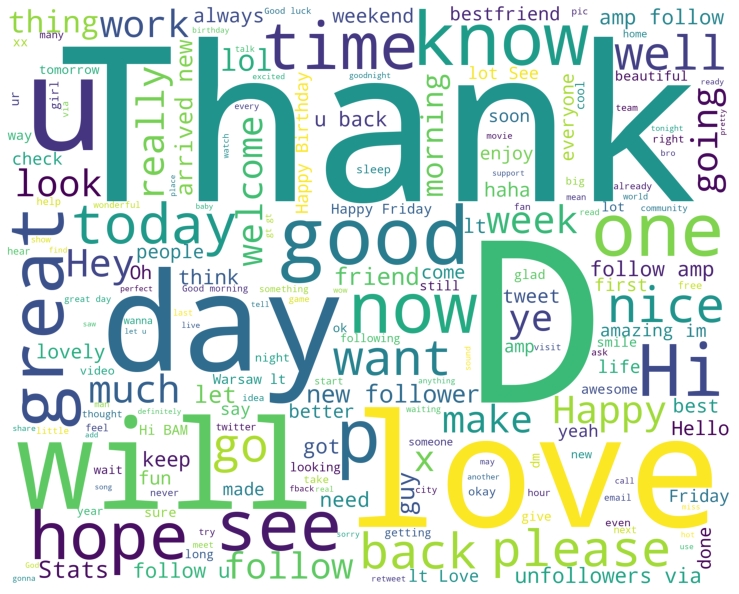

Negative words


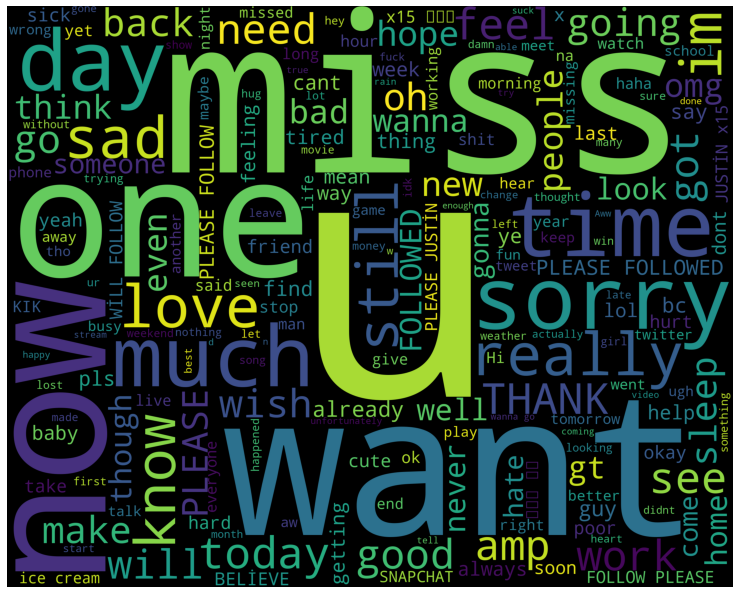

In [9]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nazira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [12]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

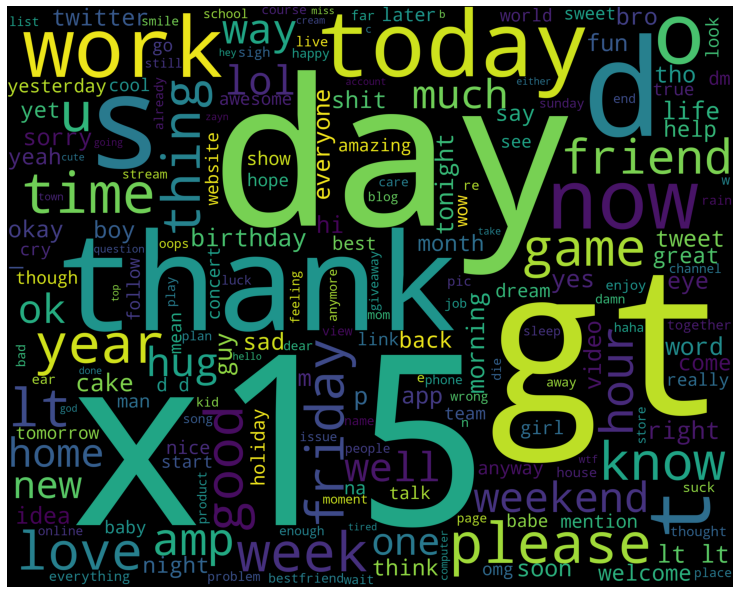

In [13]:
wordcloud_draw(w_features)

In [14]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [15]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 496/404 
[Positive]: 504/352 


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [16]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

for obj in test['Tweet']:
    true_labels.append(test.loc[test['Tweet'] == obj, 'Sentiment'].iloc[0])
    predicted_labels.append(classifier.classify(extract_features(obj.split())))

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[404  92]
 [152 352]]


In [ ]:
#measure F1 score, and recall, and precision
#build other model, e.g. random forest for this task

In [17]:
# prompt: measure F1 score, and recall, and precision

from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1_nb = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class problems
print("F1 Score:", f1_nb)

# Calculate recall
recall_nb = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall_nb)

# Calculate precision
precision_nb = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision_nb)


F1 Score: 0.7552366559176011
Recall: 0.756
Precision: 0.7599704452654094


In [18]:
# prompt: add another metric for assesing the model

from sklearn.metrics import accuracy_score

# Calculate accuracy
acc_nb = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", acc_nb)


Accuracy: 0.756


In [19]:
# prompt: based on tweets prepare training set, without nltk library

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
acc_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
precision_lr = precision_score(y_test, y_pred, average='weighted')
cm_lr = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc_lr)
print("F1 Score:", f1_lr)
print("Recall:", recall_lr)
print("Precision:", precision_lr)
print("Confusion Matrix:\n", cm_lr)


Accuracy: 0.765
F1 Score: 0.7649508790563659
Recall: 0.765
Precision: 0.7654545090581524
Confusion Matrix:
 [[388 108]
 [127 377]]


In [20]:
# prompt: the same as above but with random forest

from sklearn.ensemble import RandomForestClassifier

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
acc_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
precision_rf = precision_score(y_test, y_pred, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc_rf)
print("F1 Score:", f1_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("Confusion Matrix:\n", cm_rf)


Accuracy: 0.679
F1 Score: 0.6683952030947776
Recall: 0.679
Precision: 0.707581077175065
Confusion Matrix:
 [[427  69]
 [252 252]]


In [21]:
# SVM

from sklearn.svm import SVC

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_vectorized, y_train)

y_pred_svm = svm_model.predict(X_test_vectorized)

acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Accuracy:", acc_svm)
print("F1 Score:", f1_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("Confusion Matrix:\n", cm_svm)

Accuracy: 0.753
F1 Score: 0.75291476582231
Recall: 0.753
Precision: 0.7536271496040282
Confusion Matrix:
 [[384 112]
 [135 369]]


In [22]:
# Grad boosting

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_vectorized, y_train)

y_pred_gb = gb_model.predict(X_test_vectorized)

acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
cm_gb = confusion_matrix(y_test, y_pred_gb)

print("Accuracy:", acc_gb)
print("F1 Score:", f1_gb)
print("Recall:", recall_gb)
print("Precision:", precision_gb)
print("Confusion Matrix:\n", cm_gb)

Accuracy: 0.699
F1 Score: 0.6959051959890611
Recall: 0.699
Precision: 0.7086764164988177
Confusion Matrix:
 [[398  98]
 [203 301]]


In [23]:
# EXtra tree

from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier()
et_model.fit(X_train_vectorized, y_train)

y_pred_et = et_model.predict(X_test_vectorized)

acc_et = accuracy_score(y_test, y_pred_et)
f1_et = f1_score(y_test, y_pred_et, average='weighted')
recall_et = recall_score(y_test, y_pred_et, average='weighted')
precision_et = precision_score(y_test, y_pred_et, average='weighted')
cm_et = confusion_matrix(y_test, y_pred_et)

print("Accuracy:", acc_et)
print("F1 Score:", f1_et)
print("Recall:", recall_et)
print("Precision:", precision_et)
print("Confusion Matrix:\n", cm_et)

Accuracy: 0.737
F1 Score: 0.7366817271397813
Recall: 0.737
Precision: 0.7386139282484172
Confusion Matrix:
 [[384 112]
 [151 353]]


In [25]:
!pip install vaderSentiment

In [26]:
# prompt: add sentiment analysis with Vader library

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to the 'Tweet' column
train['Sentiment Scores'] = train['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
train['Compound Score'] = train['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
train['Vader Sentiment'] = train['Compound Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


# Print the DataFrame with sentiment scores and labels
print(train[['Tweet', 'Sentiment Scores', 'Compound Score', 'Vader Sentiment']])

# You can now analyze the 'Vader Sentiment' column to see how the Vader library categorized the tweets.

# Example: Analyze the distribution of sentiment labels
print(train['Vader Sentiment'].value_counts())


                                                  Tweet  \
9097  @thebodycoach Joe I'm sick can you come round ...   
7775  @Cramdaline It just doesn't go away... you mus...   
3951  At least I think Marrish is happening, not as ...   
4945  Friday Night in Hong Kong... On the Ferry to "...   
2251                     @SyuhxdxTengku most welcome :)   
...                                                 ...   
2772        Jdjdjdjd it's too detailed I had to stop :(   
7388    i need to get used to waking up alone again :((   
1712  all i've done today is watch law &amp; order: ...   
7087  Very bright weather today! Hope London is this...   
8695     @sambirdracing Me!! You'll have my support! :D   

                                       Sentiment Scores  Compound Score  \
9097  {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...         -0.7351   
7775  {'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'comp...         -0.4404   
3951  {'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'comp...         -0

In [42]:
# for TEST

# Apply sentiment analysis to the 'Tweet' column
test['Sentiment Scores'] = test['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
test['Compound Score'] = test['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
test['Vader Sentiment'] = test['Compound Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


# Print the DataFrame with sentiment scores and labels
print(test[['Tweet', 'Sentiment Scores', 'Compound Score', 'Vader Sentiment']])

# You can now analyze the 'Vader Sentiment' column to see how the Vader library categorized the tweets.

# Example: Analyze the distribution of sentiment labels
print(test['Vader Sentiment'].value_counts())

                                                  Tweet  \
6766              Great News :) https://t.co/hcqgiRuZ0X   
7827                 so cute :( https://t.co/VWLsPT6y1R   
9738  @Cr4sh0v3rr1de Ahm...I've never been to London...   
9310  @rightclick5ave I don't get why mb needs to cu...   
3407  @roguebassjst no no i love u most and fuck i k...   
...                                                 ...   
662   A sad new for the animal kingdom :( http://t.c...   
7455  @ecclestech @ScarletBlue9 Weather app says rai...   
4155  @bbygjrlmgc oh :( i hate when that happens i g...   
8980          @OpTic_Mochila These are not facts bro :(   
6444  My SNAPCHAT - JillCruz18 #snapchat #kiksexting...   

                                       Sentiment Scores  Compound Score  \
6766  {'neg': 0.0, 'neu': 0.22, 'pos': 0.78, 'compou...          0.7964   
7827  {'neg': 0.375, 'neu': 0.236, 'pos': 0.389, 'co...          0.0296   
9738  {'neg': 0.109, 'neu': 0.789, 'pos': 0.102, 'co...         -0

In [43]:
y_true = test['Sentiment'].tolist()
y_true = ['Negative' if label == 0 else 'Positive' for label in y_true]
y_pred_vader = test['Vader Sentiment'].tolist()

acc_vader = accuracy_score(y_true, y_pred_vader)
f1_vader = f1_score(y_true, y_pred_vader, average='weighted')
recall_vader = recall_score(y_true, y_pred_vader, average='weighted')
precision_vader = precision_score(y_true, y_pred_vader, average='weighted')
cm_vader = confusion_matrix(y_true, y_pred_vader)

print("Accuracy:", acc_vader)
print("F1 Score:", f1_vader)
print("Recall:", recall_vader)
print("Precision:", precision_vader)
print("Confusion Matrix:\n", cm_vader)

Accuracy: 0.787
F1 Score: 0.8175837164886468
Recall: 0.787
Precision: 0.875851869839728
Confusion Matrix:
 [[330  55 111]
 [  0   0   0]
 [ 18  29 457]]


C:\Users\Nazira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
import pandas as pd

df_final = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "Gradient Boosting", "Extra Trees", "VADER"],
    "Accuracy": [acc_nb, acc_lr, acc_rf, acc_svm, acc_gb, acc_et, acc_vader],
    "F1 Score": [f1_nb, f1_lr, f1_rf, f1_svm, f1_gb, f1_et, f1_vader],
    "Recall": [recall_nb, recall_lr, recall_rf, recall_svm, recall_gb, recall_et, recall_vader],
    "Precision": [precision_nb, precision_lr, precision_rf, precision_svm, precision_gb, precision_et, precision_vader]
})

df_final

,Model,Accuracy,F1 Score,Recall,Precision
0,Naive Bayes,0.756,0.755237,0.756,0.759970
1,Logistic Regression,0.765,0.764951,0.765,0.765455
2,Random Forest,0.679,0.668395,0.679,0.707581
3,SVM,0.753,0.752915,0.753,0.753627
4,Gradient Boosting,0.699,0.695905,0.699,0.708676
5,Extra Trees,0.737,0.736682,0.737,0.738614
6,VADER,0.787,0.817584,0.787,0.875852


In [45]:
print(df_final)

                 Model  Accuracy  F1 Score  Recall  Precision
0          Naive Bayes     0.756  0.755237   0.756   0.759970
1  Logistic Regression     0.765  0.764951   0.765   0.765455
2        Random Forest     0.679  0.668395   0.679   0.707581
3                  SVM     0.753  0.752915   0.753   0.753627
4    Gradient Boosting     0.699  0.695905   0.699   0.708676
5          Extra Trees     0.737  0.736682   0.737   0.738614
6                VADER     0.787  0.817584   0.787   0.875852


Above are the final results of using different machine learning algorithms on a given classification task. As can be seen, VADER sentiment analysis has better performance for classifying sentiments, when comparing to other models used in this task.